# Wordseye
- converts natural language into rendered 3D scenes
- can access server with simple html protocol
- using 'requests' instead of 'urllib'
- [gallery of pictures](http://wordseye.com/gallery)

In [3]:
import requests
from IPython.display import Image

def login():
    # sleazy but easy
    global cookie
    # put POST data in a dict
    d = dict()
    d['username']='lstead'
    d['password']= 'foobarfoo'
    d['apt'] = 't'
    url = 'https://www.wordseye.com/login'    
    # has to be a http POST request, not a GET
    r = requests.post(url, data=d)
    # permission cookie comes back in the headers - pull it out
    cookie = r.cookies['wordseye']
    return cookie
   
def depict(text):
    url = 'http://www.wordseye.com/workspace'
    cookies = dict()
    cookies['wordseye'] = cookie
    params = dict()
    params['new'] = 't'
    # reset workspace
    requests.get(url, params=params, cookies=cookies)

    params = dict()
    params['api'] = 't'
    params['depict'] = 't'
    params['ptext'] = text
    params['provide_sample_scenes'] = 'f'
    # render scene
    get = requests.get(url, params=params, cookies=cookies)
    return get


In [4]:
login()

'determiner-3004-7b8909e6-e3ed-4afc-a098-943087347fe0#determiner'

In [5]:
get = depict('tiger and dog')
list(get)

[b'{"url":"https://images.wordseye.com/display-images/3004/3621609048-u3004-G2163.jpg?dummy=3670947419-G4028","empty_scene":null,"i',
 b'nitial_scene":null,"scene_id":null,"scene_name":null,"tips_visible":null,"blurb":null,"text":"tiger and dog","error":null,"notif',
 b'ications":null,"template":null,"camera_strip":{"url":"https://images.wordseye.com/display-images/3004/3621609048-u3004-G2163-str',
 b'ip.jpg?dummy=3670947419-G4029","x_axis_rot_incr":6.0,"y_axis_rot_incr":10.28,"joint_xy?":null,"cellw":156,"cellh":112,"cell_disp',
 b'layw":312,"cell_displayh":224,"full_image_width":624,"full_image_height":451,"num_x_axis_rot":11,"num_y_axis_rot":34,"num_x_tran',
 b's":19,"num_y_trans":15,"num_zoom":15,"cell_config":"full_circle_small"},"object_mappings":[{"word":"ground","node_id":"OBJ-GLOBA',
 b'L_GROUND","aimable":null,"changed_p":true,"index":0,"node_type":"META-3D-OBJECT","best_word":"ground","words":["ground"],"type":',
 b'"META-3D-OBJECT","size":4000.0,"parts":["outside","top","bo

In [6]:
# parse JSON into a dict

#get = depict('tiger and dog')
get.json()

{'announcement': None,
 'blurb': None,
 'camera_strip': {'cell_config': 'full_circle_small',
  'cell_displayh': 224,
  'cell_displayw': 312,
  'cellh': 112,
  'cellw': 156,
  'full_image_height': 451,
  'full_image_width': 624,
  'joint_xy?': None,
  'num_x_axis_rot': 11,
  'num_x_trans': 19,
  'num_y_axis_rot': 34,
  'num_y_trans': 15,
  'num_zoom': 15,
  'url': 'https://images.wordseye.com/display-images/3004/3621609048-u3004-G2163-strip.jpg?dummy=3670947419-G4029',
  'x_axis_rot_incr': 6.0,
  'y_axis_rot_incr': 10.28},
 'empty_scene': None,
 'error': None,
 'initial_scene': None,
 'notifications': None,
 'object_mappings': [{'aimable': None,
   'best_word': 'ground',
   'changed_p': True,
   'index': 0,
   'node_id': 'OBJ-GLOBAL_GROUND',
   'node_type': 'META-3D-OBJECT',
   'parts': ['outside', 'top', 'bottom'],
   'size': 4000.0,
   'src': 'https://images.wordseye.com/visual-dictionary-data/objects/obj-gn1022.jpg',
   'type': 'META-3D-OBJECT',
   'word': 'ground',
   'words': ['gro

In [7]:
# pull url out, but junk at end

def dd(text):
    global pic, pic2
    get = depict(text)
    pic = get.json()['url']
    return pic

dd('tiger and dog')

'https://images.wordseye.com/display-images/3004/3621609048-u3004-G2163.jpg?dummy=3670947459-G4032'

In [8]:
# this should do it

def dd2(text):
    global pic, pic2
    get = depict(text)
    pic = get.json()['url']
    pic2 = pic.split('?')
    # finally got something to display
    return Image(pic2[0])

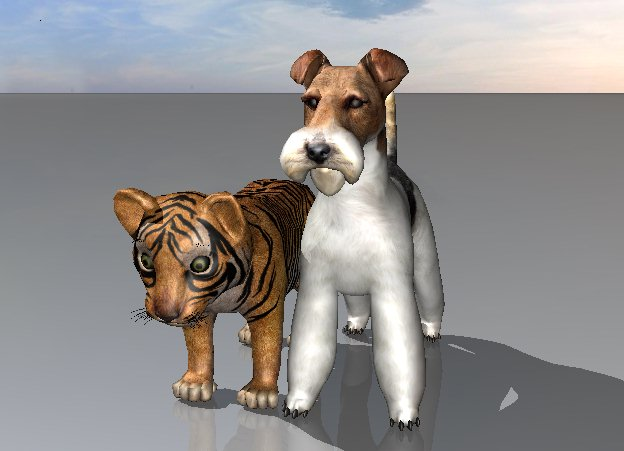

In [9]:
dd2('tiger and dog')


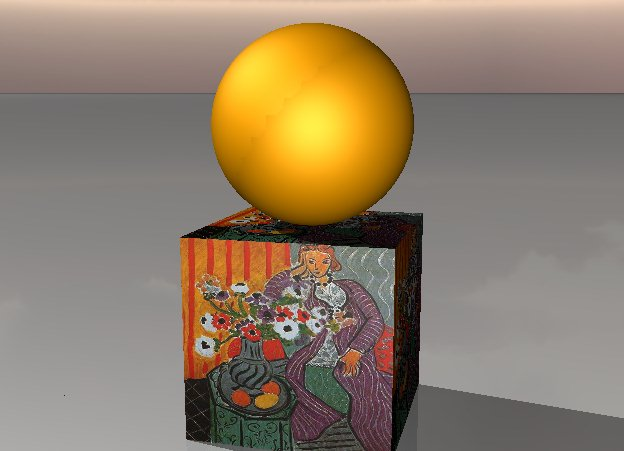

In [10]:
dd2('orange sphere on matisse cube')